## Making a heatmap

Input tables come from **heatmap_try.sh**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:

piv_data = pd.DataFrame()
heat_data  = pd.read_csv("/netscratch/dep_mercier/grp_novikova/A.Lyrata/anna_g/Eur_dipl.csv", sep=",", header=None)
heat_data = heat_data.rename(columns={0: "pos", 1: "A", 2: "C", 3: "G", 4: "T", 5: "A_out", 6: "C_out", 7: "G_out", 8: "T_out"})
heat_data.head()

,pos,A,C,G,T,A_out,C_out,G_out,T_out
0,6576869,0,0,14,0,0,0,1,0
1,6576870,14,0,0,0,1,0,0,0
2,6576872,14,0,0,0,0,0,1,0
3,6576875,14,0,0,0,1,0,0,0
4,6576881,0,0,0,14,0,0,0,1


In [ ]:
heat_data["ancestral"] = ((heat_data.A * heat_data.A_out)  + (heat_data.C * heat_data.C_out) + (heat_data["T"] * heat_data.T_out) + (heat_data.G * heat_data.G_out))
heat_data["derived"] =  (heat_data.A + heat_data.C + heat_data.G + heat_data["T"]) - heat_data.ancestral

In [ ]:
heat_data2  = pd.read_csv("/netscratch/dep_mercier/grp_novikova/A.Lyrata/anna_g/Sib_dipl.csv", sep=",", header=None)
heat_data2 = heat_data2.rename(columns={0: "pos", 1: "A", 2: "C", 3: "G", 4: "T", 5: "A_out", 6: "C_out", 7: "G_out", 8: "T_out"})
heat_data2["ancestral"] = ((heat_data2.A * heat_data2.A_out)  + (heat_data2.C * heat_data2.C_out) + (heat_data2["T"] * heat_data2.T_out) + (heat_data2.G * heat_data2.G_out))
heat_data2["derived"] =  (heat_data2.A + heat_data2.C + heat_data2.G + heat_data2["T"]) - heat_data2.ancestral

heat_data2.head()

Run for each sample

In [ ]:
piv_data["Ed"] = (heat_data.ancestral - heat_data.derived) / (heat_data.A + heat_data.C + heat_data.G + heat_data["T"]).max()
piv_data["Sd"] = (heat_data2.ancestral - heat_data2.derived) / (heat_data2.A + heat_data2.C + heat_data2.G + heat_data2["T"]).max()


In [ ]:
filt_data = piv_data[(piv_data.Sib_dipl + piv_data.Eur_tetr + piv_data.Eur_dipl + piv_data.Sib_tetr != 0)]
filt_data = filt_data[(filt_data.Sib_dipl + filt_data.Eur_tetr + filt_data.Eur_dipl + filt_data.Sib_tetr != 4)]

In [ ]:
plt. figure(figsize=(18,6), dpi=100)
sns.heatmap(filt_data.T, cmap="PiYG")

## Example plotting est-sfs

Input comes from **run_est_sfs.sh**

Text(0.5, 1.0, 'Nkunapalari')

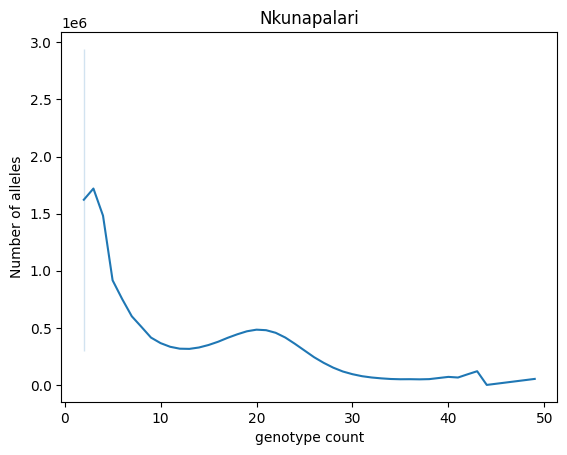

In [4]:
sfss = "0.000000,4100730.997896,2942857.999166,1720013.000235,1482373.000392,916192.001281,751865.000190,601121.000805,508814.999614,414696.000727,366077.000345,334058.001145,317369.000660,315678.001592,327749.999461,349647.000542,378242.000199,412768.998162,443477.004109,469806.996345,483928.999376,479358.004958,456481.000000,415019.995042,360175.000624,301058.003655,242875.995891,193455.001838,151112.999801,117534.999458,94010.000539,76447.998408,65068.999340,57459.998855,51921.999655,49643.999273,50138.000386,48841.999195,50749.999810,52628.998719,70355.999608,64852.999765,93006.000834,119955.002104,0.000000"
sfs = sfss.split(",")
sfs = list(map(float, sfs))
sns.lineplot(y=sfs[2:], x=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18, 19,20,21,22,23,24,2,26,27,28,29,30,31,32,33,34,35,36,37,38,49,40,41,42,43, 44])
plt.xlabel("genotype count")
plt.ylabel("Number of alleles")
plt.title("Nkunapalari")

## Plotting VolcanoFinder results

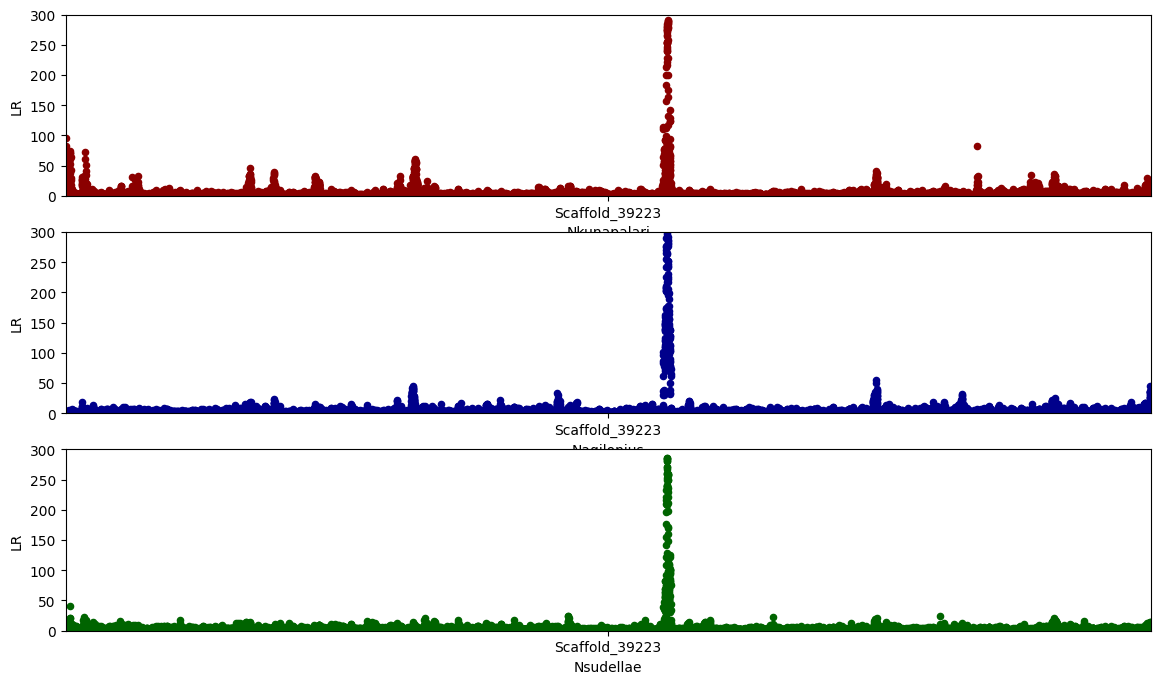

In [5]:
from scipy.stats import uniform
from scipy.stats import randint
import numpy as np
import matplotlib.pyplot as plt

# sample data

#df.chromosome = df.chromosome.astype('category')
#df.chromosome = df.chromosome.cat.set_categories(['ch-%i' % i for i in range(12)], ordered=True)
#df = df.sort_values('chromosome')
df = pd.read_csv("/netscratch/dep_mercier/grp_novikova/volcano_finder/Nkunapalari_volcano_Scaffold_39223.tsv", sep="\t")
# How to plot gene vs. -log10(pvalue) and colour it by chromosome?
df['ind'] = range(len(df))
df["chromosome"] = "Scaffold_39223"
df_grouped = df.groupby(('chromosome'))

# manhattan plot
fig = plt.figure(figsize=(14, 8)) # Set the figure size
ax = fig.add_subplot(311)
colors = ['darkred','darkgreen','darkblue', 'gold']
x_labels = []
x_labels_pos = []
for num, (name, group) in enumerate(df_grouped):
    group.plot(kind='scatter', x='ind', y='LR',color=colors[num % len(colors)], ax=ax)
    x_labels.append(name)
    x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0])/2))
ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels)

# set axis limits
ax.set_xlim([0, len(df)])
ax.set_ylim([0, 300])

# x axis label
ax.set_xlabel('Nkunapalari')

df = pd.read_csv("/netscratch/dep_mercier/grp_novikova/volcano_finder/Naquilonius_volcano_Scaffold_39223.tsv", sep="\t")
# How to plot gene vs. -log10(pvalue) and colour it by chromosome?
df['ind'] = range(len(df))
df["chromosome"] = "Scaffold_39223"
df_grouped = df.groupby(('chromosome'))

# manhattan plot
#fig = plt.figure(figsize=(14, 8)) # Set the figure size
ax = fig.add_subplot(312)
colors = ['darkblue', 'gold', 'darkred','darkgreen']
x_labels = []
x_labels_pos = []
for num, (name, group) in enumerate(df_grouped):
    group.plot(kind='scatter', x='ind', y='LR',color=colors[num % len(colors)], ax=ax)
    x_labels.append(name)
    x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0])/2))
ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels)

# set axis limits
ax.set_xlim([0, len(df)])
ax.set_ylim([0, 300])

# x axis label
ax.set_xlabel('Naqilonius')

df = pd.read_csv("/netscratch/dep_mercier/grp_novikova/volcano_finder/Nsudellae_volcano_Scaffold_39223.tsv", sep="\t")
# How to plot gene vs. -log10(pvalue) and colour it by chromosome?
df['ind'] = range(len(df))
df["chromosome"] = "Scaffold_39223"
df_grouped = df.groupby(('chromosome'))

# manhattan plot
#fig = plt.figure(figsize=(14, 8)) # Set the figure size
ax = fig.add_subplot(313)
colors = ['darkgreen','darkblue', 'gold', 'darkred']
x_labels = []
x_labels_pos = []
for num, (name, group) in enumerate(df_grouped):
    group.plot(kind='scatter', x='ind', y='LR',color=colors[num % len(colors)], ax=ax)
    x_labels.append(name)
    x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0])/2))
ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels)

# set axis limits
ax.set_xlim([0, len(df)])
ax.set_ylim([0, 300])

# x axis label
ax.set_xlabel('Nsudellae')

# show the graph
plt.show()

## D statistic

Input comes from the ScanTools.

Reperated for all populations.

In [6]:
full1 = pd.DataFrame()

for n in range(1, 9):
    #file_name = "./scantools_try/ScanTools/" + "sc" + str(n) + "TMD_WPM.txt" #
    file_name = "/netscratch/dep_mercier/grp_novikova/A.Lyrata/anna_g/scantools_try/ScanTools/" + "sc" + str(n) + "dipl_sc"+ str(n) + "_WPM.txt"
    chrom = pd.read_csv(file_name, sep="\t")
    chrom = chrom.drop(columns=["ploidy", "sampind", "win_size"])
    full1 = pd.concat([full1, chrom], axis=0)
    #print(full.head())
    #break
full1.head()

,pop,scaff,start,end,num_snps,num_sites,num_singletons,avg_freq,avg_Ehet,Diversity,ThetaW,Pi,ThetaH,ThetaL,D,H,E
0,dipl,scaffold_1,0.0,1000.0,13,300,1,0.646154,0.164615,0.015852,4.595315,4.755556,13.911111,9.333333,0.158676,-3.430251,3.632043
1,dipl,scaffold_1,1000.0,2000.0,7,317,2,0.228571,0.160000,0.007851,2.474400,2.488889,1.066667,1.777778,0.024801,0.873478,-0.827812
2,dipl,scaffold_1,2000.0,3000.0,5,302,4,0.120000,0.104000,0.003826,1.767429,1.155556,0.177778,0.666667,-1.388181,0.770223,-1.629611
3,dipl,scaffold_1,3000.0,4000.0,19,313,13,0.173684,0.117368,0.015832,6.716229,4.955556,2.377778,3.666667,-1.228306,0.698285,-1.745560
4,dipl,scaffold_1,4000.0,5000.0,35,356,18,0.208571,0.143143,0.031273,12.372002,11.133333,5.088889,8.111111,-0.483754,0.945121,-1.470337


In [ ]:
ax=sns.lineplot(x=[1,2,3,4,5,6,7,8], y=full2[full2.scaff == "Genome"].D, label="PUD")
sns.lineplot(x=[1,2,3,4,5,6,7,8], y=full[full.scaff == "Genome"].D, label="dipl")
sns.lineplot(x=[1,2,3,4,5,6,7,8], y=full1[full1.scaff == "Genome"].D, label="TMD")
ax.set(xlabel='chr')

In [ ]:
ax=sns.lineplot(data=full2[full2.scaff == "scaffold_8"].D.rolling(window=1000).mean(), label="PUD")
sns.lineplot(data=full[full.scaff == "scaffold_8"].D.rolling(window=1000).mean(), label="dipl")
sns.lineplot(data=full1[full1.scaff == "scaffold_8"].D.rolling(window=1000).mean(), label="TMD")
ax.set(xlabel='chr')

<AxesSubplot: ylabel='D'>

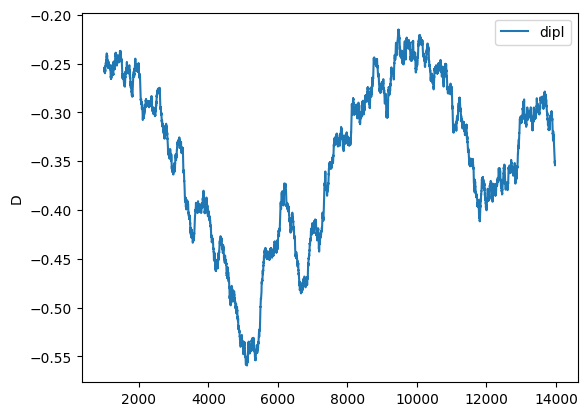

In [7]:
sns.lineplot(data=full1[full1.scaff == "scaffold_8"].D.rolling(window=1000).mean(), label="dipl")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(0.0, 24485243.0)

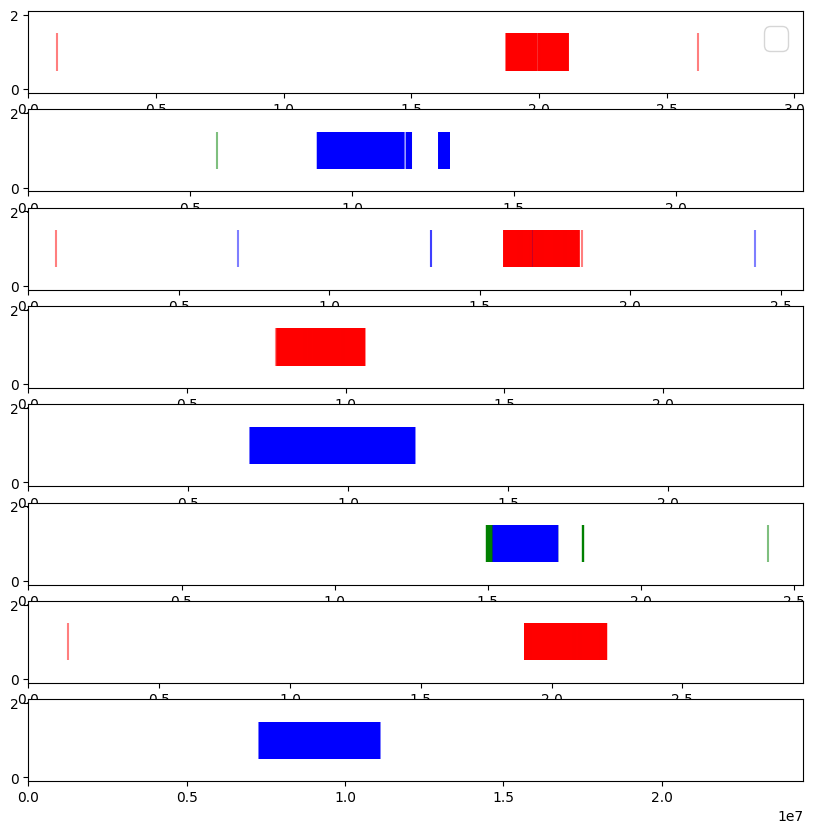

In [2]:
#Centromere graph

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(811)
te8_rep =  pd.read_csv("/netscratch/dep_mercier/grp_novikova/A.Lyrata/anna_g/mabs_assemblies/trash/all.repeats.from.MN47_big_chrom_all.fa.csv")
chr8_rep = te8_rep[ (te8_rep["region.name"].str.contains("scaffold_1"))]
plt.eventplot(chr8_rep[(chr8_rep.width == 168)].start, alpha=0.5, orientation='horizontal', colors="blue")
plt.eventplot(chr8_rep[(chr8_rep.width == 179)].start, alpha=0.5, orientation='horizontal', colors="red")



#plt.eventplot(chr8_rep[(chr8_rep.width == 177)].start, alpha=0.5, orientation='horizontal', colors="green", label="pAge2, 177")
plt.legend(fontsize=22)
plt.xlim([0, chr8_rep.end.max()])
ax = fig.add_subplot(812)
chr8_rep = te8_rep[ (te8_rep["region.name"].str.contains("scaffold_2"))]
plt.eventplot(chr8_rep[(chr8_rep.width == 168)].start, alpha=0.5, orientation='horizontal', colors="blue")
plt.eventplot(chr8_rep[(chr8_rep.width == 179)].start, alpha=0.5, orientation='horizontal', colors="red")



plt.eventplot(chr8_rep[(chr8_rep.width == 177)].start, alpha=0.5, orientation='horizontal', colors="green")
plt.xlim([0, chr8_rep.end.max()])
ax = fig.add_subplot(813)
chr8_rep = te8_rep[ (te8_rep["region.name"].str.contains("scaffold_3"))]
plt.eventplot(chr8_rep[(chr8_rep.width == 168)].start, alpha=0.5, orientation='horizontal', colors="blue")
plt.eventplot(chr8_rep[(chr8_rep.width == 179)].start, alpha=0.5, orientation='horizontal', colors="red")



#plt.eventplot(chr8_rep[(chr8_rep.width == 177)].start, alpha=0.5, orientation='horizontal', colors="green")
plt.xlim([0, chr8_rep.end.max()])
ax = fig.add_subplot(814)
chr8_rep = te8_rep[ (te8_rep["region.name"].str.contains("scaffold_4"))]
plt.eventplot(chr8_rep[(chr8_rep.width == 168)].start, alpha=0.5, orientation='horizontal', colors="blue")
plt.eventplot(chr8_rep[(chr8_rep.width == 179)].start, alpha=0.5, orientation='horizontal', colors="red")



#plt.eventplot(chr8_rep[(chr8_rep.width == 177)].start, alpha=0.5, orientation='horizontal', colors="green")
plt.xlim([0, chr8_rep.end.max()])
ax = fig.add_subplot(815)
chr8_rep = te8_rep[(te8_rep["region.name"].str.contains("scaffold_5"))]
plt.eventplot(chr8_rep[(chr8_rep.width == 168)].start, alpha=0.5, orientation='horizontal', colors="blue")
plt.eventplot(chr8_rep[(chr8_rep.width == 179)].start, alpha=0.5, orientation='horizontal', colors="red")

plt.xlim([0, chr8_rep.end.max()])
ax = fig.add_subplot(816)
chr8_rep = te8_rep[ (te8_rep["region.name"].str.contains("scaffold_6"))]
plt.eventplot(chr8_rep[(chr8_rep.width == 177)].start, alpha=0.5, orientation='horizontal', colors="green")

#plt.eventplot(chr8_rep[(chr8_rep.width == 352)].start, alpha=0.5, orientation='horizontal', colors="green")
plt.eventplot(chr8_rep[(chr8_rep.width == 168)].start, alpha=0.5, orientation='horizontal', colors="blue")



plt.xlim([0, chr8_rep.end.max()])
ax = fig.add_subplot(817)
chr8_rep = te8_rep[ (te8_rep["region.name"].str.contains("scaffold_7"))]
plt.eventplot(chr8_rep[(chr8_rep.width == 168)].start, alpha=0.5, orientation='horizontal', colors="blue")
plt.eventplot(chr8_rep[(chr8_rep.width == 179)].start, alpha=0.5, orientation='horizontal', colors="red")



#plt.eventplot(chr8_rep[(chr8_rep.width == 177)].start, alpha=0.5, orientation='horizontal', colors="")
plt.xlim([0, chr8_rep.end.max()])
ax = fig.add_subplot(818)
chr8_rep = te8_rep[ (te8_rep["region.name"].str.contains("scaffold_8"))]
plt.eventplot(chr8_rep[(chr8_rep.width == 168)].start, alpha=0.5, orientation='horizontal', colors="blue")
plt.eventplot(chr8_rep[(chr8_rep.width == 179)].start, alpha=0.5, orientation='horizontal', colors="red")



plt.eventplot(chr8_rep[(chr8_rep.width == 177)].start, alpha=0.5, orientation='horizontal', colors="green")
plt.xlim([0, chr8_rep.end.max()])

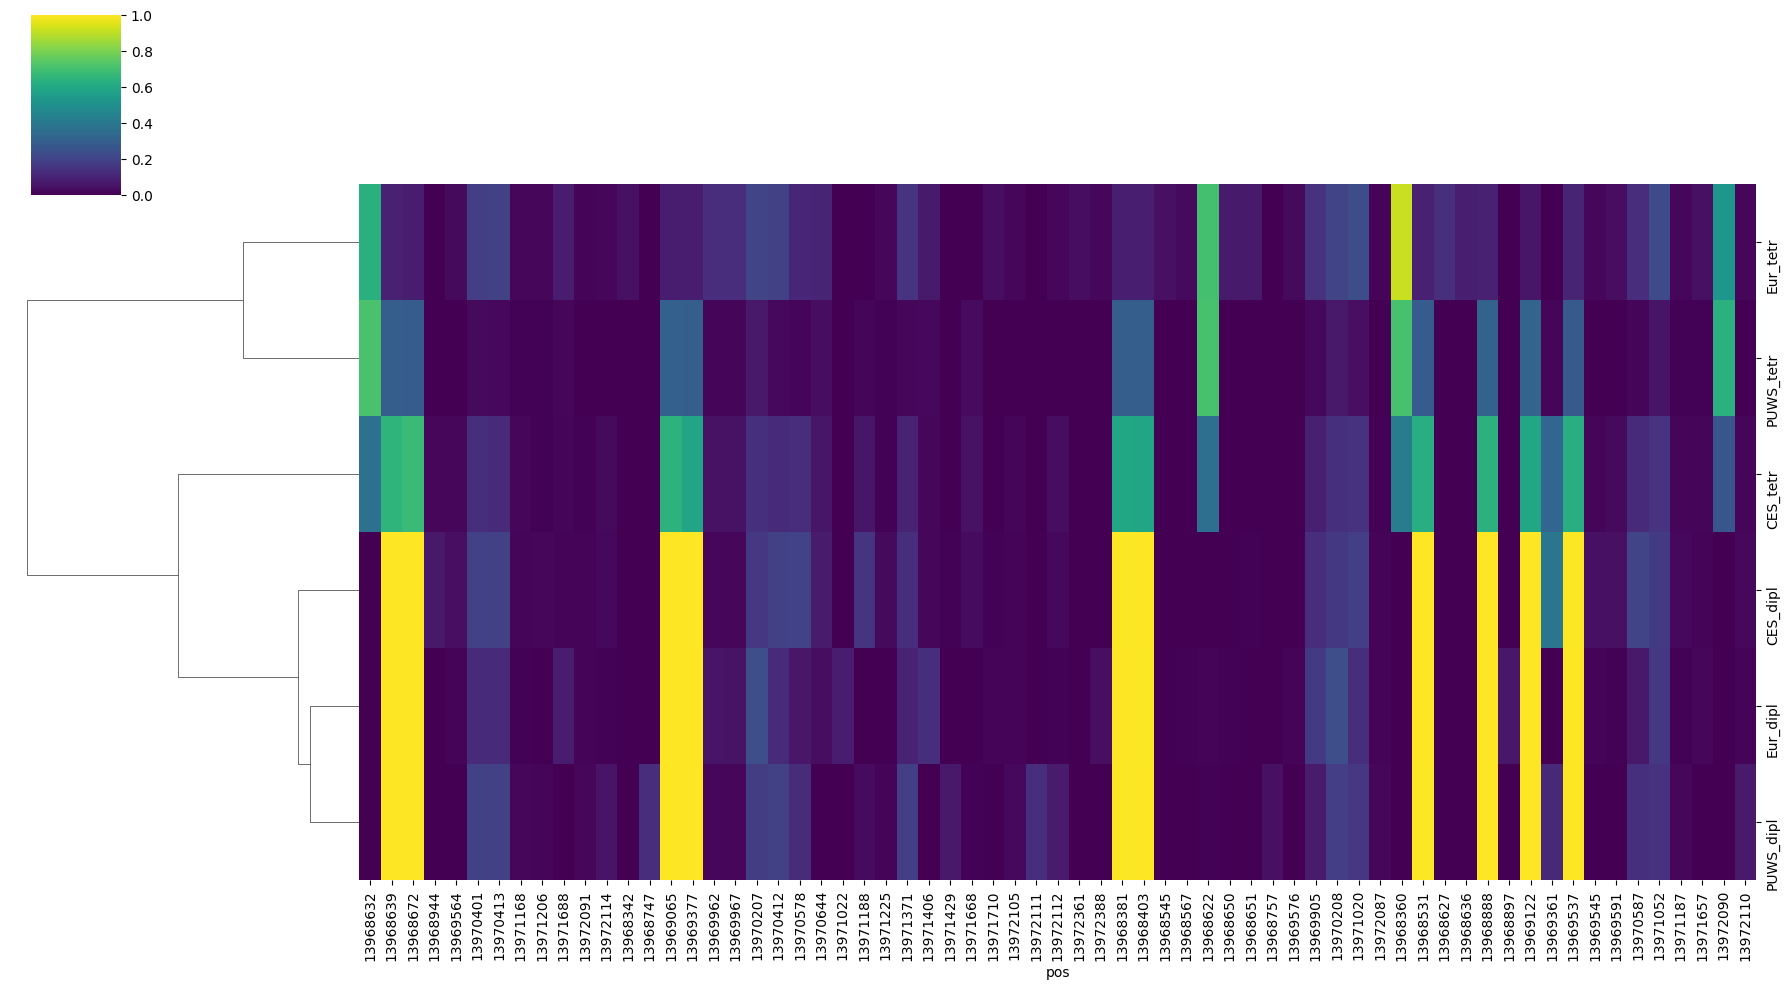

In [3]:
# Heatmap of SNPs. Input from heatmap_maker.sh

piv_data = pd.DataFrame()
gene_name = "AL2G25920"
path = "/netscratch/dep_mercier/grp_novikova/A.Lyrata/anna_g/" + gene_name + "_Eur_dipl_fin.csv"
heat_data2  = pd.read_csv(path, sep=",", header=None)
heat_data2 = heat_data2.rename(columns={0: "pos", 1: "A", 2: "C", 3: "G", 4: "T", 5: "A_out", 6: "C_out", 7: "G_out", 8: "T_out"})
heat_data_pol = heat_data2[(heat_data2.A_out == (heat_data2.A_out + heat_data2.C_out + heat_data2.T_out + heat_data2.G_out))]
heat_data_pol = pd.concat([heat_data_pol, heat_data2[(heat_data2.C_out == (heat_data2.A_out + heat_data2.C_out + heat_data2.T_out + heat_data2.G_out))]])
heat_data_pol = pd.concat([heat_data_pol, heat_data2[(heat_data2.G_out == (heat_data2.A_out + heat_data2.C_out + heat_data2.T_out + heat_data2.G_out))]])
heat_data_pol = pd.concat([heat_data_pol, heat_data2[(heat_data2.T_out == (heat_data2.A_out + heat_data2.C_out + heat_data2.T_out + heat_data2.G_out))]])
heat_data_pol.A_out[heat_data_pol.A_out > 0] = 1
heat_data_pol.C_out[heat_data_pol.C_out > 0] = 1
heat_data_pol.G_out[heat_data_pol.G_out > 0] = 1
heat_data_pol.T_out[heat_data_pol.T_out > 0] = 1

heat_data_pol["ancestral"] = ((heat_data_pol.A * heat_data_pol.A_out)  + (heat_data_pol.C * heat_data_pol.C_out) + (heat_data_pol["T"] * heat_data_pol.T_out) + (heat_data_pol.G * heat_data_pol.G_out))
heat_data_pol["derived"] =  (heat_data_pol.A + heat_data_pol.C + heat_data_pol.G + heat_data_pol["T"]) - heat_data_pol.ancestral
piv_data["Eur_dipl"] = heat_data_pol.derived / (heat_data_pol.ancestral + heat_data_pol.derived) 

path = "/netscratch/dep_mercier/grp_novikova/A.Lyrata/anna_g/" + gene_name + "_Eur_tetr_fin.csv"
heat_data2  = pd.read_csv(path, sep=",", header=None)
heat_data2 = heat_data2.rename(columns={0: "pos", 1: "A", 2: "C", 3: "G", 4: "T", 5: "A_out", 6: "C_out", 7: "G_out", 8: "T_out"})
heat_data_pol = heat_data2[(heat_data2.A_out == (heat_data2.A_out + heat_data2.C_out + heat_data2.T_out + heat_data2.G_out))]
heat_data_pol = pd.concat([heat_data_pol, heat_data2[(heat_data2.C_out == (heat_data2.A_out + heat_data2.C_out + heat_data2.T_out + heat_data2.G_out))]])
heat_data_pol = pd.concat([heat_data_pol, heat_data2[(heat_data2.G_out == (heat_data2.A_out + heat_data2.C_out + heat_data2.T_out + heat_data2.G_out))]])
heat_data_pol = pd.concat([heat_data_pol, heat_data2[(heat_data2.T_out == (heat_data2.A_out + heat_data2.C_out + heat_data2.T_out + heat_data2.G_out))]])
heat_data_pol.A_out[heat_data_pol.A_out > 0] = 1
heat_data_pol.C_out[heat_data_pol.C_out > 0] = 1
heat_data_pol.G_out[heat_data_pol.G_out > 0] = 1
heat_data_pol.T_out[heat_data_pol.T_out > 0] = 1

heat_data_pol["ancestral"] = ((heat_data_pol.A * heat_data_pol.A_out)  + (heat_data_pol.C * heat_data_pol.C_out) + (heat_data_pol["T"] * heat_data_pol.T_out) + (heat_data_pol.G * heat_data_pol.G_out))
heat_data_pol["derived"] =  (heat_data_pol.A + heat_data_pol.C + heat_data_pol.G + heat_data_pol["T"]) - heat_data_pol.ancestral
piv_data["Eur_tetr"] = heat_data_pol.derived / (heat_data_pol.ancestral + heat_data_pol.derived) 

path = "/netscratch/dep_mercier/grp_novikova/A.Lyrata/anna_g/" + gene_name + "_CES_dipl_fin.csv"
heat_data2  = pd.read_csv(path, sep=",", header=None)
heat_data2 = heat_data2.rename(columns={0: "pos", 1: "A", 2: "C", 3: "G", 4: "T", 5: "A_out", 6: "C_out", 7: "G_out", 8: "T_out"})
heat_data_pol = heat_data2[(heat_data2.A_out == (heat_data2.A_out + heat_data2.C_out + heat_data2.T_out + heat_data2.G_out))]
heat_data_pol = pd.concat([heat_data_pol, heat_data2[(heat_data2.C_out == (heat_data2.A_out + heat_data2.C_out + heat_data2.T_out + heat_data2.G_out))]])
heat_data_pol = pd.concat([heat_data_pol, heat_data2[(heat_data2.G_out == (heat_data2.A_out + heat_data2.C_out + heat_data2.T_out + heat_data2.G_out))]])
heat_data_pol = pd.concat([heat_data_pol, heat_data2[(heat_data2.T_out == (heat_data2.A_out + heat_data2.C_out + heat_data2.T_out + heat_data2.G_out))]])
heat_data_pol.A_out[heat_data_pol.A_out > 0] = 1
heat_data_pol.C_out[heat_data_pol.C_out > 0] = 1
heat_data_pol.G_out[heat_data_pol.G_out > 0] = 1
heat_data_pol.T_out[heat_data_pol.T_out > 0] = 1

heat_data_pol["ancestral"] = ((heat_data_pol.A * heat_data_pol.A_out)  + (heat_data_pol.C * heat_data_pol.C_out) + (heat_data_pol["T"] * heat_data_pol.T_out) + (heat_data_pol.G * heat_data_pol.G_out))
heat_data_pol["derived"] =  (heat_data_pol.A + heat_data_pol.C + heat_data_pol.G + heat_data_pol["T"]) - heat_data_pol.ancestral
piv_data["CES_dipl"] = heat_data_pol.derived / (heat_data_pol.ancestral + heat_data_pol.derived) 

path = "/netscratch/dep_mercier/grp_novikova/A.Lyrata/anna_g/" + gene_name + "_PUWS_dipl_fin.csv"
heat_data2  = pd.read_csv(path, sep=",", header=None)
heat_data2 = heat_data2.rename(columns={0: "pos", 1: "A", 2: "C", 3: "G", 4: "T", 5: "A_out", 6: "C_out", 7: "G_out", 8: "T_out"})
heat_data_pol = heat_data2[(heat_data2.A_out == (heat_data2.A_out + heat_data2.C_out + heat_data2.T_out + heat_data2.G_out))]
heat_data_pol = pd.concat([heat_data_pol, heat_data2[(heat_data2.C_out == (heat_data2.A_out + heat_data2.C_out + heat_data2.T_out + heat_data2.G_out))]])
heat_data_pol = pd.concat([heat_data_pol, heat_data2[(heat_data2.G_out == (heat_data2.A_out + heat_data2.C_out + heat_data2.T_out + heat_data2.G_out))]])
heat_data_pol = pd.concat([heat_data_pol, heat_data2[(heat_data2.T_out == (heat_data2.A_out + heat_data2.C_out + heat_data2.T_out + heat_data2.G_out))]])
heat_data_pol.A_out[heat_data_pol.A_out > 0] = 1
heat_data_pol.C_out[heat_data_pol.C_out > 0] = 1
heat_data_pol.G_out[heat_data_pol.G_out > 0] = 1
heat_data_pol.T_out[heat_data_pol.T_out > 0] = 1

heat_data_pol["ancestral"] = ((heat_data_pol.A * heat_data_pol.A_out)  + (heat_data_pol.C * heat_data_pol.C_out) + (heat_data_pol["T"] * heat_data_pol.T_out) + (heat_data_pol.G * heat_data_pol.G_out))
heat_data_pol["derived"] =  (heat_data_pol.A + heat_data_pol.C + heat_data_pol.G + heat_data_pol["T"]) - heat_data_pol.ancestral
piv_data["PUWS_dipl"] = heat_data_pol.derived / (heat_data_pol.ancestral + heat_data_pol.derived) 

path = "/netscratch/dep_mercier/grp_novikova/A.Lyrata/anna_g/" + gene_name + "_CES_tetr_fin.csv"
heat_data2  = pd.read_csv(path, sep=",", header=None)
heat_data2 = heat_data2.rename(columns={0: "pos", 1: "A", 2: "C", 3: "G", 4: "T", 5: "A_out", 6: "C_out", 7: "G_out", 8: "T_out"})
heat_data_pol = heat_data2[(heat_data2.A_out == (heat_data2.A_out + heat_data2.C_out + heat_data2.T_out + heat_data2.G_out))]
heat_data_pol = pd.concat([heat_data_pol, heat_data2[(heat_data2.C_out == (heat_data2.A_out + heat_data2.C_out + heat_data2.T_out + heat_data2.G_out))]])
heat_data_pol = pd.concat([heat_data_pol, heat_data2[(heat_data2.G_out == (heat_data2.A_out + heat_data2.C_out + heat_data2.T_out + heat_data2.G_out))]])
heat_data_pol = pd.concat([heat_data_pol, heat_data2[(heat_data2.T_out == (heat_data2.A_out + heat_data2.C_out + heat_data2.T_out + heat_data2.G_out))]])
heat_data_pol.A_out[heat_data_pol.A_out > 0] = 1
heat_data_pol.C_out[heat_data_pol.C_out > 0] = 1
heat_data_pol.G_out[heat_data_pol.G_out > 0] = 1
heat_data_pol.T_out[heat_data_pol.T_out > 0] = 1

heat_data_pol["ancestral"] = ((heat_data_pol.A * heat_data_pol.A_out)  + (heat_data_pol.C * heat_data_pol.C_out) + (heat_data_pol["T"] * heat_data_pol.T_out) + (heat_data_pol.G * heat_data_pol.G_out))
heat_data_pol["derived"] =  (heat_data_pol.A + heat_data_pol.C + heat_data_pol.G + heat_data_pol["T"]) - heat_data_pol.ancestral
piv_data["CES_tetr"] = heat_data_pol.derived / (heat_data_pol.ancestral + heat_data_pol.derived) 

path = "/netscratch/dep_mercier/grp_novikova/A.Lyrata/anna_g/" + gene_name + "_PUWS_tetr_fin.csv"
heat_data2  = pd.read_csv(path, sep=",", header=None)
heat_data2 = heat_data2.rename(columns={0: "pos", 1: "A", 2: "C", 3: "G", 4: "T", 5: "A_out", 6: "C_out", 7: "G_out", 8: "T_out"})
heat_data_pol = heat_data2[(heat_data2.A_out == (heat_data2.A_out + heat_data2.C_out + heat_data2.T_out + heat_data2.G_out))]
heat_data_pol = pd.concat([heat_data_pol, heat_data2[(heat_data2.C_out == (heat_data2.A_out + heat_data2.C_out + heat_data2.T_out + heat_data2.G_out))]])
heat_data_pol = pd.concat([heat_data_pol, heat_data2[(heat_data2.G_out == (heat_data2.A_out + heat_data2.C_out + heat_data2.T_out + heat_data2.G_out))]])
heat_data_pol = pd.concat([heat_data_pol, heat_data2[(heat_data2.T_out == (heat_data2.A_out + heat_data2.C_out + heat_data2.T_out + heat_data2.G_out))]])
heat_data_pol.A_out[heat_data_pol.A_out > 0] = 1
heat_data_pol.C_out[heat_data_pol.C_out > 0] = 1
heat_data_pol.G_out[heat_data_pol.G_out > 0] = 1
heat_data_pol.T_out[heat_data_pol.T_out > 0] = 1

heat_data_pol["ancestral"] = ((heat_data_pol.A * heat_data_pol.A_out)  + (heat_data_pol.C * heat_data_pol.C_out) + (heat_data_pol["T"] * heat_data_pol.T_out) + (heat_data_pol.G * heat_data_pol.G_out))
heat_data_pol["derived"] =  (heat_data_pol.A + heat_data_pol.C + heat_data_pol.G + heat_data_pol["T"]) - heat_data_pol.ancestral
piv_data["PUWS_tetr"] = heat_data_pol.derived / (heat_data_pol.ancestral + heat_data_pol.derived) 

piv_data["pos"] = heat_data2.pos
filt_data = piv_data[(piv_data.CES_tetr + piv_data.PUWS_tetr + piv_data.Eur_tetr + piv_data.Eur_dipl + piv_data.CES_dipl + piv_data.PUWS_dipl >= 0.03)]
filt_data = filt_data[(filt_data.CES_tetr + filt_data.CES_dipl + filt_data.PUWS_tetr + filt_data.PUWS_dipl + filt_data.Eur_dipl + filt_data.Eur_tetr <= 5.57)]

filt_data.index = filt_data.pos
filt_data = filt_data.drop(columns="pos")

sns.clustermap(filt_data.T, cmap="viridis", col_cluster=False, figsize=(18,10))